In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


copy from https://www.tensorflow.org/tutorials/keras/classification?hl=ko

In [18]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten

import time

# 데이터 준비

## 데이터 다운로드

In [19]:
# (raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.fashion_mnist.load_data()

In [20]:
print(raw_train_x.shape)
print(raw_train_y.shape)
print(raw_test_x.shape)
print(raw_test_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [21]:
print(raw_train_x[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

9


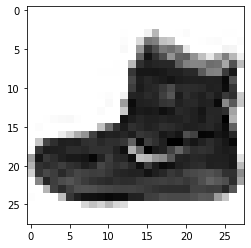

0


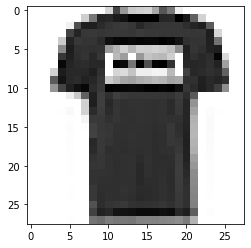

0


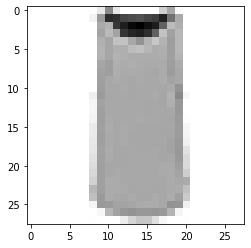

3


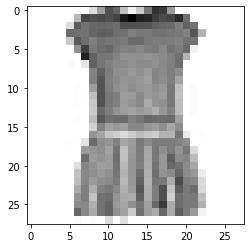

In [22]:
for i in range(4):
  print(raw_train_y[i])
  plt.imshow(raw_train_x[i], cmap=plt.cm.binary)
  plt.show()


In [23]:
# ADD
class_names =  ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

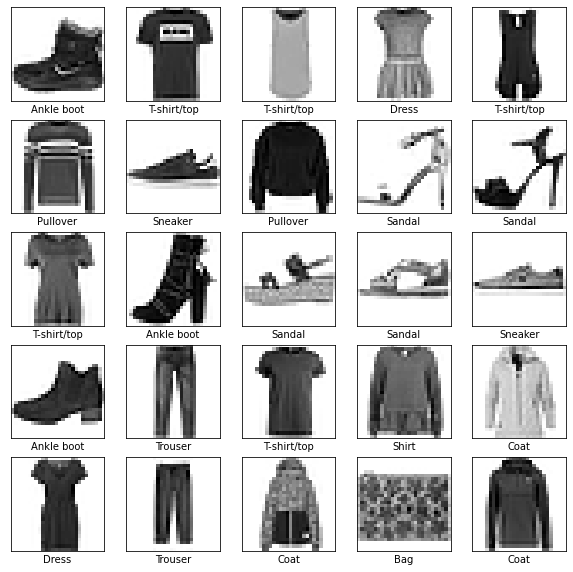

In [27]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1) # 한줄에 5개, 5줄로 그린다. 그중에 i+1 번째칸에 그린다.
    plt.xticks([])       # 이미지 그릴때 가로축의 눈금 그리지 않는다.
    plt.yticks([])       # 이미지 그릴때 세로축의 눈금 그리지 않는다.
    plt.grid(False)      # 이미지 내의 눈금을 그리지 않는다.
    plt.imshow(raw_train_x[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[raw_train_y[i]])
plt.show()

## Normalization

In [28]:
print(np.max(raw_train_x[:,]))
print(np.max(raw_test_x[:,]))

train_x = raw_train_x/255
test_x = raw_test_x/255

train_y = raw_train_y
test_y = raw_test_y

print(np.max(train_x[:,]))
print(np.max(test_x[:,]))


255
255
1.0
1.0


In [29]:
print(train_x.shape)

(60000, 28, 28)


# 모델 준비

In [30]:
model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(28,28)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 28, 10)            290       
_________________________________________________________________
flatten (Flatten)            (None, 280)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2810      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 24us/sample - loss: 0.9207 - acc: 0.6811
Epoch 2/5
60000/60000 [==============================] - 1s 23us/sample - loss: 0.5311 - acc: 0.8127
Epoch 3/5
60000/60000 [==============================] - 1s 22us/sample - loss: 0.4875 - acc: 0.8282
Epoch 4/5
60000/60000 [==============================] - 1s 23us/sample - loss: 0.4620 - acc: 0.8378
Epoch 5/5
60000/60000 [==============================] - 1s 23us/sample - loss: 0.4454 - acc: 0.8442


In [32]:
loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

10000/10000 [==============================] - 0s 35us/sample - loss: 0.4691 - acc: 0.8342
loss= 0.4691360417366028
acc= 0.8342


[[1.9651763e-05 4.3191594e-08 8.1665706e-07 ... 8.7754585e-02
  8.0364263e-03 8.2166237e-01]
 [4.1366926e-05 3.5255044e-07 9.5081306e-01 ... 2.8077293e-10
  3.9642622e-05 9.8597616e-11]
 [1.1594652e-04 9.9967885e-01 2.5403808e-06 ... 1.4785108e-13
  3.4653298e-09 1.6104485e-14]
 ...
 [4.5187864e-03 7.3779290e-07 1.8892920e-04 ... 4.8531096e-08
  9.8405474e-01 2.0883117e-08]
 [4.5932666e-05 9.9726546e-01 1.7263710e-05 ... 6.7008412e-09
  1.1131395e-07 7.2731460e-11]
 [1.0459670e-03 6.5421715e-05 5.8364478e-04 ... 8.1485748e-02
  4.6180587e-02 1.9882120e-02]]
[9 2 1 ... 8 1 5]
9 Ankle boot


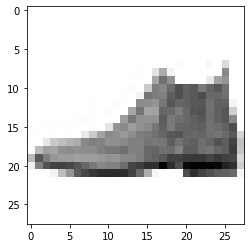

2 Pullover


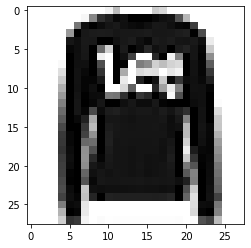

1 Trouser


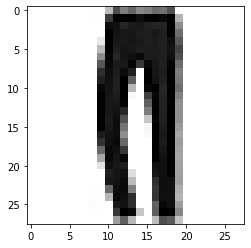

1 Trouser


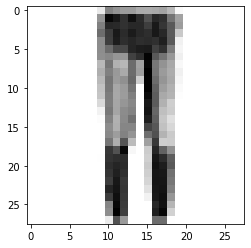

In [16]:
y_ = model.predict(test_x)
print(y_)
predicted = np.argmax(y_, axis=1)
print(predicted)

for i in range(4):
  # print(predicted[i])
  predicted_class_index = predicted[i] # ADD
  print(predicted_class_index, class_names[predicted_class_index]) # ADD
  plt.imshow(raw_test_x[i], cmap=plt.cm.binary)
  plt.show()